In [25]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')

In [26]:
df_orig = pd.read_csv('processed-hh-ru.csv')
df = df_orig.copy()
df

,resume_id,profession,gender,work_experience_months,vacancy_region,applicant_age,study_months,successful_topic
0,20110t055,"Менеджер по продажам, менеджер по работе с кли...",female,68,Москва,29,60,0
1,1186t64t5,"Менеджер по продажам, менеджер по работе с кли...",male,115,Москва,35,12,1
2,1t102tkb4,"Менеджер по продажам, менеджер по работе с кли...",male,52,Москва,27,12,1
3,20b558k11,"Менеджер по продажам, менеджер по работе с кли...",female,141,Москва,36,60,0
4,t62tt116,"Менеджер по продажам, менеджер по работе с кли...",female,42,Москва,25,12,1
...,...,...,...,...,...,...,...,...
497270,60856625,Менеджер по закупкам,male,133,Москва,32,60,0
497271,t16b8l8,Менеджер по закупкам,male,90,Москва,39,60,0
497272,l6625t6,Менеджер по закупкам,female,179,Москва,37,12,0
497273,k440bb85,Менеджер по закупкам,male,0,Москва,46,60,0


In [27]:
# Создаем условие для определения значения в новом столбце 'group'
def assign_group(row):
    if row['profession'] in ['воспитатель', 'няня']:
        return 'human'
    else:
        return 'other'

# Применяем функцию assign_group к DataFrame
df['group'] = df.apply(assign_group, axis=1)

df

,resume_id,profession,gender,work_experience_months,vacancy_region,applicant_age,study_months,successful_topic,group
0,20110t055,"Менеджер по продажам, менеджер по работе с кли...",female,68,Москва,29,60,0,other
1,1186t64t5,"Менеджер по продажам, менеджер по работе с кли...",male,115,Москва,35,12,1,other
2,1t102tkb4,"Менеджер по продажам, менеджер по работе с кли...",male,52,Москва,27,12,1,other
3,20b558k11,"Менеджер по продажам, менеджер по работе с кли...",female,141,Москва,36,60,0,other
4,t62tt116,"Менеджер по продажам, менеджер по работе с кли...",female,42,Москва,25,12,1,other
...,...,...,...,...,...,...,...,...,...
497270,60856625,Менеджер по закупкам,male,133,Москва,32,60,0,other
497271,t16b8l8,Менеджер по закупкам,male,90,Москва,39,60,0,other
497272,l6625t6,Менеджер по закупкам,female,179,Москва,37,12,0,other
497273,k440bb85,Менеджер по закупкам,male,0,Москва,46,60,0,other


In [28]:
# Создаем условие для определения значения в новом столбце 'group'
def assign_group(row):
    if row['profession'] in ['Автомойщик', 
                             'Автослесарь, автомеханик',
                             'Мастер-приемщик', 
                             'Менеджер по продажам, менеджер по работе с клиентами']:
        return 'АвтоБиз'
    elif row['profession'] in ['Администратор',
                               'Делопроизводитель, архивариус',
                               'Курьер',
                               'Менеджер/руководитель АХО',
                               'Оператор ПК, оператор базы данных',
                               'Офис-менеджер',
                               'Переводчик',
                               'Секретарь, помощник руководителя, ассистент']:
        return 'АдминПерсон'
    elif row['profession'] in ['Военнослужащий',
                               'Охранник',
                               'Полицейский',
                               'Специалист по информационной безопасности', 
                               'Специалист службы безопасности']:
        return 'Безопасность'
    elif row['profession'] in ['Генеральный директор, исполнительный директор (CEO)', 
                               'Директор по информационным технологиям (CIO)',  
                               'Директор по маркетингу и PR (CMO)',
                               'Директор по персоналу (HRD)', 
                               'Директор юридического департамента (CLO)',
                               'Коммерческий директор (CCO)',
                               'Начальник производства',
                               'Операционный директор (COO)',
                               'Руководитель отдела аналитики', 
                               'Руководитель отдела логистики',
                               'Руководитель отдела маркетинга и рекламы', 
                               'Руководитель отдела персонала',
                               'Руководитель филиала',
                               'Технический директор (CTO)',
                               'Финансовый директор (CFO)']:
        return 'ВшСрМенедж'
    elif row['profession'] in ['Геодезист',
                               'Геолог',
                               'Лаборант',
                               'Машинист',
                               'Научный специалист, исследователь',
                               'Начальник смены, мастер участка',
                               'Технолог']:
        return 'ДобСырья'
    elif row['profession'] in ['Администратор',
                               'Водитель',
                               'Воспитатель, няня',
                               'Дворник',
                               'Курьер',
                               'Официант, бармен, бариста',
                               'Охранник',
                               'Уборщица, уборщик']:
        return 'ОбслПерсон'
    elif row['profession'] in ['Менеджер по закупкам',
                               'Специалист по тендерам']:
        return 'Закупки'
    elif row['profession'] in ['BI-аналитик, аналитик данных',
                               'DevOps-инженер',
                               'Аналитик',
                               'Арт-директор, креативный директор',
                               'Бизнес-аналитик',
                               'Гейм-дизайнер',
                               'Дата-сайентист',
                               'Дизайнер, художник',
                               'Директор по информационным технологиям (CIO)',
                               'Менеджер продукта',
                               'Методолог',
                               'Программист, разработчик',
                               'Продуктовый аналитик',
                               'Руководитель группы разработки',
                               'Руководитель отдела аналитики',
                               'Руководитель проектов',
                               'Сетевой инженер',
                               'Системный администратор',
                               'Системный аналитик',
                               'Системный инженер',
                               'Специалист по информационной безопасности',
                               'Специалист технической поддержки',
                               'Тестировщик',
                               'Технический директор (CTO)',
                               'Технический писатель']:
        return 'ИнфТех'
    elif row['profession'] in ["Арт-директор, креативный директор", 
                               "Артист, актер, аниматор",
                               "Видеооператор, видеомонтажер",
                               "Гейм-дизайнер",
                               "Дизайнер, художник",
                               "Журналист, корреспондент",
                               "Копирайтер, редактор, корректор",
                               "Продюсер",
                               "Режиссер, сценарист",
                               "Фотограф, ретушер"]:
        return 'Медиа'
    elif row['profession'] in ['Event-менеджер',
                           'PR-менеджер',
                           'SMM-менеджер, контент-менеджер',
                           'Аналитик',
                           'Арт-директор, креативный директор',
                           'Дизайнер, художник',
                           'Директор по маркетингу и PR (CMO)',
                           'Копирайтер, редактор, корректор',
                           'Маркетолог-аналитик',
                           'Менеджер по маркетингу, интернет-маркетолог',
                           'Менеджер по продажам, менеджер по работе с клиентами',
                           'Менеджер по работе с партнерами',
                           'Промоутер',
                           'Руководитель отдела маркетинга и рекламы']:
        return 'Реклама'
    elif row['profession'] in ['Администратор',
                           'Ассистент врача',
                           'Ветеринарный врач',
                           'Врач',
                           'Главный врач, заведующий отделением',
                           'Заведующий аптекой',
                           'Лаборант',
                           'Медицинская сестра, медицинский брат',
                           'Медицинский представитель',
                           'Научный специалист, исследователь',
                           'Специалист по сертификации',
                           'Фармацевт-провизор']:
        return 'Медицина'
    elif row['profession'] in ['Бизнес-тренер',
                           'Воспитатель, няня',
                           'Лаборант',
                           'Методист',
                           'Научный специалист, исследователь',
                           'Психолог',
                           'Учитель, преподаватель, педагог']:
        return 'Наука'
    elif row['profession'] in ['Агент по недвижимости',
                           'Аналитик',
                           'Брокер',
                           'Кассир-операционист',
                           'Коммерческий директор (CCO)',
                           'Координатор отдела продаж',
                           'Кредитный специалист',
                           'Менеджер по продажам, менеджер по работе с клиентами',
                           'Менеджер по работе с партнерами',
                           'Оператор call-центра, специалист контактного центра',
                           'Продавец-консультант, продавец-кассир',
                           'Руководитель отдела клиентского обслуживания',
                           'Руководитель отдела продаж',
                           'Руководитель филиала',
                           'Специалист по сертификации',
                           'Специалист технической поддержки',
                           'Страховой агент',
                           'Торговый представитель']:
        return 'Продажи'
    elif row['profession'] in ['Инженер ПНР',
                           'Инженер по качеству',
                           'Инженер по охране труда и технике безопасности, инженер-эколог',
                           'Инженер по эксплуатации',
                           'Инженер-конструктор, инженер-проектировщик',
                           'Инженер-электроник, инженер-электронщик',
                           'Инженер-энергетик, инженер-электрик',
                           'Контролёр ОТК',
                           'Лаборант',
                           'Мастер по ремонту оборудования, техники',
                           'Машинист',
                           'Метролог',
                           'Механик',
                           'Научный специалист, исследователь',
                           'Начальник производства',
                           'Начальник смены, мастер участка',
                           'Оператор производственной линии',
                           'Оператор станков с ЧПУ',
                           'Сварщик',
                           'Сервисный инженер, инженер-механик',
                           'Слесарь, сантехник',
                           'Специалист по сертификации',
                           'Технолог',
                           'Токарь, фрезеровщик, шлифовщик',
                           'Швея, портной, закройщик',
                           'Электромонтажник']:
        return 'Производство'
    elif row['profession'] in ['Автослесарь, автомеханик',
                           'Водитель',
                           'Грузчик',
                           'Кладовщик',
                           'Маляр, штукатур',
                           'Машинист',
                           'Механик',
                           'Монтажник',
                           'Оператор производственной линии',
                           'Оператор станков с ЧПУ',
                           'Разнорабочий',
                           'Сварщик',
                           'Сервисный инженер, инженер-механик',
                           'Слесарь, сантехник',
                           'Токарь, фрезеровщик, шлифовщик',
                           'Упаковщик, комплектовщик',
                           'Электромонтажник']:
        return 'РабПерсон'  
    elif row['profession'] in ['Администратор магазина, администратор торгового зала',
                           'Директор магазина, директор сети магазинов',
                           'Мерчандайзер',
                           'Продавец-консультант, продавец-кассир',
                           'Промоутер',
                           'Супервайзер',
                           'Товаровед']:
        return 'РознТорг'
    elif row['profession'] in ['Агроном',
                           'Ветеринарный врач',
                           'Зоотехник',
                           'Машинист',
                           'Сервисный инженер, инженер-механик',
                           'Технолог']:
        return 'СельХоз'
    if row['profession'] in ['Администратор', 
                         'Косметолог', 
                         'Массажист', 
                         'Мастер ногтевого сервиса', 
                         'Менеджер по продажам, менеджер по работе с клиентами', 
                         'Парикмахер', 
                         'Фитнес-тренер, инструктор тренажерного зала']:
        return 'Фитнесс'
    if row['profession'] in ['Аналитик', 
                         'Бизнес-аналитик', 
                         'Менеджер/консультант по стратегии', 
                         'Руководитель проектов', 
                         'Финансовый аналитик, инвестиционный аналитик']:
        return 'Инвест'
    if row['profession'] in ['Андеррайтер', 
                         'Оценщик', 
                         'Страховой агент']:
        return 'Страхов'
    if row['profession'] in ['Агент по недвижимости', 
                         'Архитектор', 
                         'Брокер', 
                         'Геодезист', 
                         'Главный инженер проекта', 
                         'Дизайнер, художник', 
                         'Инженер ПТО, инженер-сметчик', 
                         'Инженер по охране труда и технике безопасности, инженер-эколог', 
                         'Инженер по эксплуатации', 
                         'Инженер-конструктор, инженер-проектировщик', 
                         'Маляр, штукатур', 
                         'Машинист', 
                         'Монтажник', 
                         'Прораб, мастер СМР', 
                         'Разнорабочий', 
                         'Руководитель проектов', 
                         'Руководитель строительного проекта', 
                         'Сварщик', 
                         'Слесарь, сантехник', 
                         'Электромонтажник']:
        return 'Недвиж'
    if row['profession'] in ['Бортпроводник', 
                         'Водитель', 
                         'Грузчик', 
                         'Диспетчер', 
                         'Кладовщик', 
                         'Курьер', 
                         'Машинист', 
                         'Менеджер по логистике, менеджер по ВЭД', 
                         'Начальник склада', 
                         'Руководитель отдела логистики', 
                         'Упаковщик, комплектовщик']:
        return 'Логист'
    if row['profession'] in ['Администратор', 
                         'Менеджер по туризму', 
                         'Менеджер ресторана', 
                         'Менеджер/руководитель АХО', 
                         'Официант, бармен, бариста', 
                         'Повар, пекарь, кондитер', 
                         'Уборщица, уборщик', 
                         'Хостес']:
        return 'Туризм'
    if row['profession'] in ['Бизнес-тренер', 
                         'Директор по персоналу (HRD)', 
                         'Менеджер по компенсациям и льготам', 
                         'Менеджер по персоналу', 
                         'Руководитель отдела персонала', 
                         'Специалист по кадрам', 
                         'Специалист по подбору персонала']:
        return 'Тренинг'
    if row['profession'] in ['Аудитор', 
                         'Брокер', 
                         'Бухгалтер', 
                         'Казначей', 
                         'Комплаенс-менеджер', 
                         'Кредитный специалист', 
                         'Методолог', 
                         'Специалист по взысканию задолженности', 
                         'Финансовый аналитик, инвестиционный аналитик', 
                         'Финансовый директор (CFO)', 
                         'Финансовый контролер', 
                         'Финансовый менеджер', 
                         'Экономист']:
        return 'Бухгалт'
    if row['profession'] in ['Директор юридического департамента (CLO)', 
                         'Комплаенс-менеджер', 
                         'Юрисконсульт', 
                         'Юрист']:
        return 'Юрист'
    else: 
        return 'Другие'

# Применяем функцию assign_group к DataFrame
df['group'] = df.apply(assign_group, axis=1)

# Выводим результат
df

,resume_id,profession,gender,work_experience_months,vacancy_region,applicant_age,study_months,successful_topic,group
0,20110t055,"Менеджер по продажам, менеджер по работе с кли...",female,68,Москва,29,60,0,АвтоБиз
1,1186t64t5,"Менеджер по продажам, менеджер по работе с кли...",male,115,Москва,35,12,1,АвтоБиз
2,1t102tkb4,"Менеджер по продажам, менеджер по работе с кли...",male,52,Москва,27,12,1,АвтоБиз
3,20b558k11,"Менеджер по продажам, менеджер по работе с кли...",female,141,Москва,36,60,0,АвтоБиз
4,t62tt116,"Менеджер по продажам, менеджер по работе с кли...",female,42,Москва,25,12,1,АвтоБиз
...,...,...,...,...,...,...,...,...,...
497270,60856625,Менеджер по закупкам,male,133,Москва,32,60,0,Закупки
497271,t16b8l8,Менеджер по закупкам,male,90,Москва,39,60,0,Закупки
497272,l6625t6,Менеджер по закупкам,female,179,Москва,37,12,0,Закупки
497273,k440bb85,Менеджер по закупкам,male,0,Москва,46,60,0,Закупки


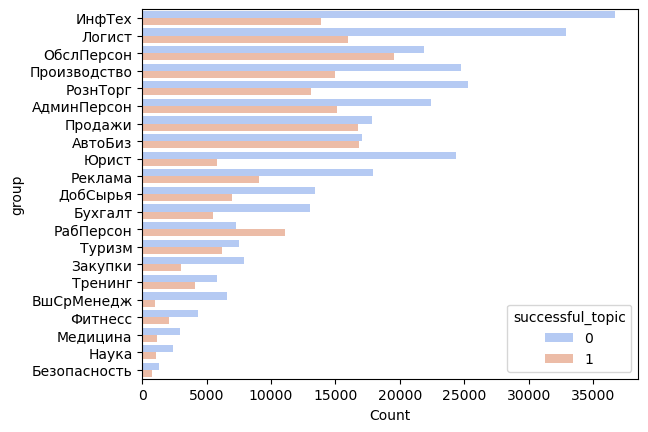

In [29]:
sns.countplot(data=df, y='group', hue='successful_topic', palette='coolwarm', order=df['group'].value_counts().index)
plt.xlabel('Count')
plt.show()

In [30]:
    # Получение списка уникальных значений и их сортировка
unique_regions = sorted(df['vacancy_region'].unique())

unique_regions

['Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Донецкая область',
 'Еврейская АО',
 'Забайкальский край',
 'Запорожская область',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкарская республика',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Карачаево-Черкесская Республика',
 'Кемеровская область',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Луганская область',
 'Магаданская область',
 'Москва',
 'Московская область',
 'Мурманская область',
 'Ненецкий АО',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',
 '

In [31]:
region_to_fo = {'Москва': 'Москва',
    'Санкт-Петербург': 'Северо-Западный ФО',
    'Свердловская область': 'Уральский ФО',
    'Республика Дагестан': 'Северо-Кавказский ФО',
    'Республика Татарстан': 'Приволжский ФО',
    'Алтайский край': 'Сибирский ФО',
    'Ленинградская область': 'Северо-Западный ФО',
    'Липецкая область': 'Центральный ФО',
    'Луганская область': 'Южный ФО',
    'Магаданская область': 'Дальневосточный ФО',
    'Москва': 'Москва',
    'Московская область': 'Центральный ФО',
    'Мурманская область': 'Северо-Западный ФО',
    'Ненецкий АО': 'Северо-Западный ФО',
    'Нижегородская область': 'Приволжский ФО',
    'Новгородская область': 'Северо-Западный ФО',
    'Новосибирская область': 'Сибирский ФО',
    'Омская область': 'Сибирский ФО',
    'Оренбургская область': 'Приволжский ФО',
    'Орловская область': 'Центральный ФО',
    'Пензенская область': 'Приволжский ФО',
    'Пермский край': 'Уральский ФО',
    'Приморский край': 'Дальневосточный ФО',
    'Псковская область': 'Северо-Западный ФО',
    'Республика Адыгея': 'Южный ФО',
    'Республика Алтай': 'Сибирский ФО',
    'Республика Башкортостан': 'Приволжский ФО',
    'Республика Бурятия': 'Сибирский ФО',
    'Республика Дагестан': 'Северо-Кавказский ФО',
    'Республика Ингушетия': 'Северо-Кавказский ФО',
    'Республика Калмыкия': 'Южный ФО',
    'Республика Карелия': 'Северо-Западный ФО',
    'Республика Коми': 'Северо-Западный ФО',
    'Республика Крым': 'Южный ФО',
    'Республика Марий Эл': 'Приволжский ФО',
    'Республика Мордовия': 'Приволжский ФО',
    'Республика Саха (Якутия)': 'Дальневосточный ФО',
    'Республика Северная Осетия-Алания': 'Северо-Кавказский ФО',
    'Республика Татарстан': 'Приволжский ФО',
    'Республика Тыва': 'Сибирский ФО',
    'Республика Хакасия': 'Сибирский ФО',
    'Ростовская область': 'Южный ФО',
    'Рязанская область': 'Центральный ФО',
    'Самарская область': 'Приволжский ФО',
    'Санкт-Петербург': 'Санкт-Петербург',
    'Саратовская область': 'Приволжский ФО',
    'Сахалинская область': 'Дальневосточный ФО',
    'Свердловская область': 'Уральский ФО',
    'Смоленская область': 'Центральный ФО',
    'Ставропольский край': 'Северо-Кавказский ФО',
    'Тамбовская область': 'Центральный ФО',
    'Тверская область': 'Центральный ФО',
    'Томская область': 'Сибирский ФО',
    'Тульская область': 'Центральный ФО',
    'Тюменская область': 'Уральский ФО',
    'Удмуртская Республика': 'Приволжский ФО',
                'Ульяновская область': 'Приволжский ФО',
                'Хабаровский край': 'Дальневосточный ФО',
                'Ханты-Мансийский АО - Югра': 'Уральский ФО',
                'Челябинская область': 'Уральский ФО',
                'Чеченская республика': 'Северо-Кавказский ФО',
                'Чувашская Республика': 'Приволжский ФО',
                'Чукотский АО': 'Дальневосточный ФО',
                'Ямало-Ненецкий АО': 'Уральский ФО',
                'Ярославская область': 'Центральный ФО',
                'Ивановская область': 'Центральный ФО',
    'Краснодарский край': 'Южный ФО',
    'Брянская область': 'Центральный ФО',
    'Забайкальский край': 'Дальневосточный ФО',
    'Калужская область': 'Центральный ФО',
    'Красноярский край': 'Сибирский ФО',
    'Иркутская область': 'Сибирский ФО',
    'Воронежская область': 'Центральный ФО',
    'Белгородская область': 'Центральный ФО',
    'Астраханская область': 'Южный ФО',
    'Волгоградская область': 'Южный ФО',
    'Калининградская область': 'Северо-Западный ФО',
    'Владимирская область': 'Центральный ФО',
    'Архангельская область': 'Северо-Западный ФО',
    'Кемеровская область': 'Сибирский ФО',
    'Вологодская область': 'Северо-Западный ФО',
    'Кировская область': 'Приволжский ФО',
    'Амурская область': 'Дальневосточный ФО',
    'Камчатский край': 'Дальневосточный ФО',
    'Курская область': 'Центральный ФО',
    'Донецкая область': 'Южный ФО',
    'Костромская область': 'Центральный ФО',
    'Курганская область': 'Уральский ФО',
    'Карачаево-Черкесская Республика': 'Северо-Кавказский ФО',
    'Кабардино-Балкарская республика': 'Северо-Кавказский ФО',
    'Еврейская АО': 'Дальневосточный ФО',
    'Запорожская область': 'Южный ФО'
                }
df['aok'] = df['vacancy_region'].map(region_to_fo)
df

,resume_id,profession,gender,work_experience_months,vacancy_region,applicant_age,study_months,successful_topic,group,aok
0,20110t055,"Менеджер по продажам, менеджер по работе с кли...",female,68,Москва,29,60,0,АвтоБиз,Москва
1,1186t64t5,"Менеджер по продажам, менеджер по работе с кли...",male,115,Москва,35,12,1,АвтоБиз,Москва
2,1t102tkb4,"Менеджер по продажам, менеджер по работе с кли...",male,52,Москва,27,12,1,АвтоБиз,Москва
3,20b558k11,"Менеджер по продажам, менеджер по работе с кли...",female,141,Москва,36,60,0,АвтоБиз,Москва
4,t62tt116,"Менеджер по продажам, менеджер по работе с кли...",female,42,Москва,25,12,1,АвтоБиз,Москва
...,...,...,...,...,...,...,...,...,...,...
497270,60856625,Менеджер по закупкам,male,133,Москва,32,60,0,Закупки,Москва
497271,t16b8l8,Менеджер по закупкам,male,90,Москва,39,60,0,Закупки,Москва
497272,l6625t6,Менеджер по закупкам,female,179,Москва,37,12,0,Закупки,Москва
497273,k440bb85,Менеджер по закупкам,male,0,Москва,46,60,0,Закупки,Москва


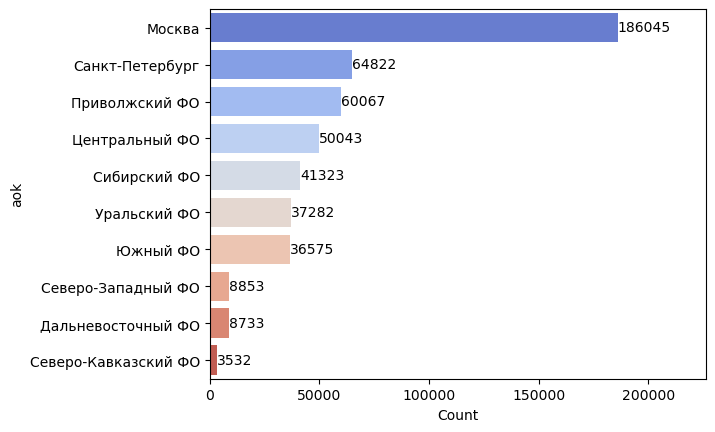

In [32]:
ax = sns.countplot(data=df, y='aok', palette='coolwarm', order=df['aok'].value_counts().index)
plt.xlabel('Count')
ax.bar_label(ax.containers[0])
plt.xlim(0, df['aok'].value_counts().max() + 40000)
plt.show()


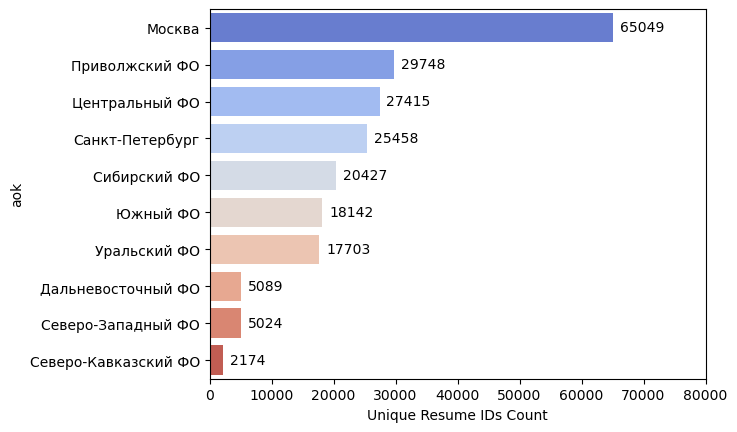

In [33]:
# Подсчет уникальных значений resume_id для каждой категории aok
unique_resume_counts = df.groupby('aok')['resume_id'].nunique().reset_index()

# Сортировка по убыванию количества уникальных значений
unique_resume_counts = unique_resume_counts.sort_values(by='resume_id', ascending=False)

# Построение столбчатой диаграммы
ax = sns.barplot(x='resume_id', y='aok', data=unique_resume_counts, palette='coolwarm')

# Добавление меток на столбцах
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')
plt.xlim(0, 80000)
plt.xlabel('Unique Resume IDs Count')
plt.ylabel('aok')
plt.show()
unique_resume_counts = unique_resume_counts.reset_index(inplace=True)

In [34]:
    # Получение списка уникальных значений и их сортировка
unique_regions = (df['aok'].unique())

unique_regions


array(['Москва', 'Центральный ФО', 'Приволжский ФО', 'Северо-Западный ФО',
       'Южный ФО', 'Сибирский ФО', 'Дальневосточный ФО', 'Уральский ФО',
       'Санкт-Петербург', 'Северо-Кавказский ФО'], dtype=object)

In [11]:
# Выполните тест корреляции Пирсона
correlation, p_value = pearsonr(df['successful_topic'], df['work_experience_months'])

# Выведите результат
print(f'p-value: {p_value}')

p-value: 0.0


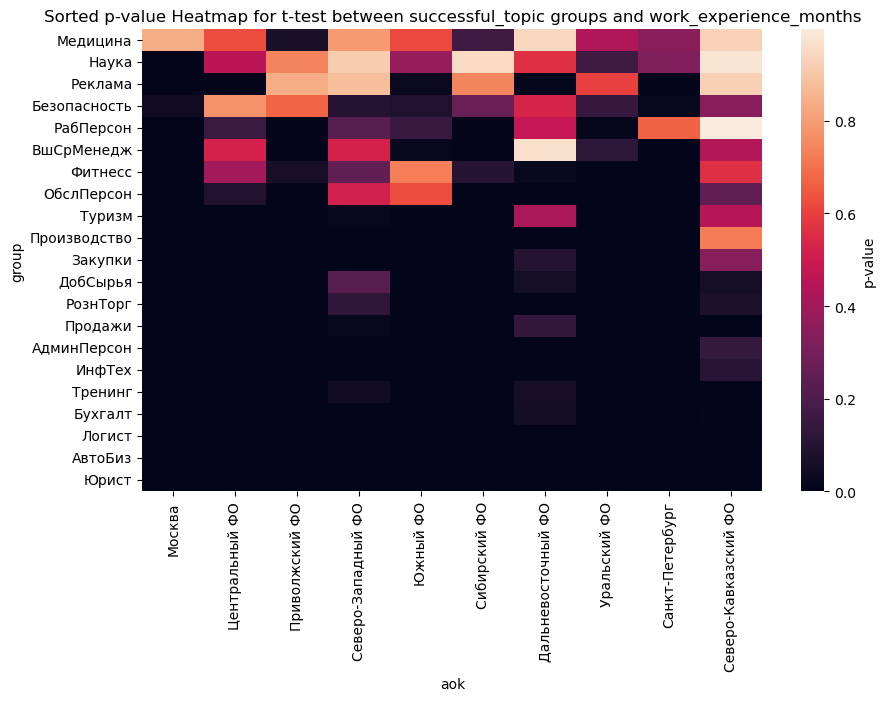

NameError: name 'T_stat' is not defined

In [35]:
# Создаем пустой DataFrame для хранения p-values
p_values_df = pd.DataFrame(index=df['group'].unique(), columns=df['aok'].unique())

# Проходим по уникальным комбинациям 'group' и 'aok' и вычисляем p-value
for group_val in df['group'].unique():
    for aok_val in df['aok'].unique():
        subset_group_1 = df[(df['group'] == group_val) & (df['aok'] == aok_val) & (df['successful_topic'] == 1)]
        subset_group_0 = df[(df['group'] == group_val) & (df['aok'] == aok_val) & (df['successful_topic'] == 0)]
        
        # Выполняем t-тест
        t_stat, p_value = ttest_ind(subset_group_1['work_experience_months'], subset_group_0['work_experience_months'], equal_var=False)
        
        # Заполняем p-value в DataFrame
        p_values_df.at[group_val, aok_val] = p_value

# Преобразуем значения в числовой формат
p_values_df = p_values_df.astype(float)

# Считаем среднее значение для каждой строки
p_values_df['mean'] = p_values_df.mean(axis=1)

# Сортируем значения 'aok' по убыванию количества
aok_counts = df['aok'].value_counts()
sorted_aoks = aok_counts.index

# Сортируем DataFrame по возрастанию среднего значения
p_values_df_sorted = p_values_df.sort_values(by='mean', ascending=False)

p_values_df_sorted = p_values_df_sorted.drop(columns=['mean'])

# Выводим отсортированную heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_df_sorted, cbar_kws={'label': 'p-value'})
plt.xlabel('aok')
plt.ylabel('group')
plt.title('Sorted p-value Heatmap for t-test between successful_topic groups and work_experience_months')
plt.show()

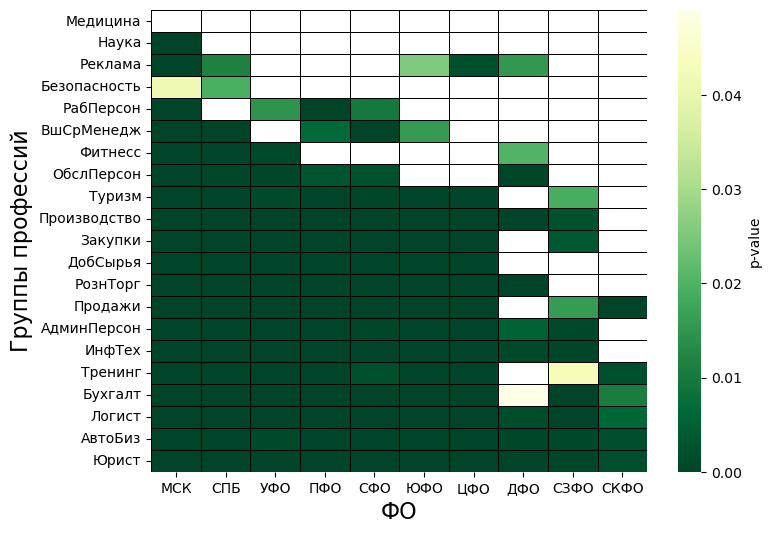

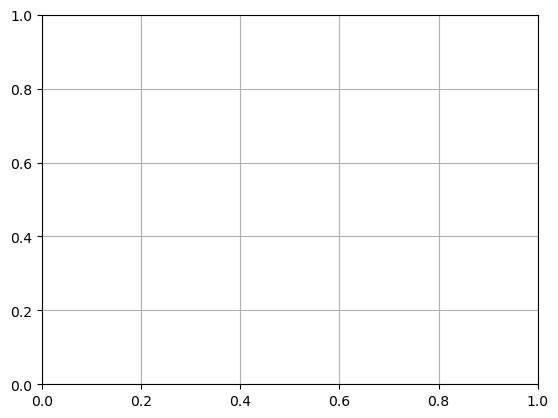

In [78]:
# Создаем порядок сортировки для оси x
order_x = ['Москва', 'Санкт-Петербург', 'Уральский ФО', 'Приволжский ФО', 'Сибирский ФО', 'Южный ФО', 'Центральный ФО', 'Дальневосточный ФО', 'Северо-Западный ФО', 'Северо-Кавказский ФО']

# Создаем DataFrame (замените это вашим реальным DataFrame)
# p_values_df = ...

# Вычисляем среднее значение в каждой строке и сортируем строки
p_values_df['mean'] = p_values_df.mean(axis=1)
p_values_df = p_values_df.sort_values(by='mean', ascending=False).drop('mean', axis=1)

# Отсортируйте DataFrame
p_values_df = p_values_df[order_x]

# Создаем маску для значений в диапазоне 0-0.05
mask = (p_values_df >= 0) & (p_values_df <= 0.05)

# Выводим heatmap с учетом маски
plt.figure(figsize=(8, 6))
sns.heatmap(
    p_values_df,
    cmap='YlGn_r',
    cbar_kws={'label': 'p-value'},
    mask=~mask,  # Инвертируем маску, чтобы значения >0.05 были черными
    linewidths=.5,
    linecolor='black'
)
plt.xticks(
    ticks=[.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
    labels=[
        'МСК', 'СПБ', 'УФО', 'ПФО', 'СФО', 'ЮФО', 'ЦФО', 'ДФО', 'СЗФО', 'СКФО'
    ],
    rotation=0,
    fontsize=10
)
plt.xlabel('ФО', fontsize=16)
plt.ylabel('Группы профессий', fontsize=16)
# plt.title('p-value Heatmap for t-test between successful_topic groups and work_experience_months')
plt.show()
plt.grid()

                  index  Среднее значение  count
0                Москва          0.041749  65049
1       Санкт-Петербург          0.065011  29748
2          Уральский ФО          0.070559  27415
3        Приволжский ФО          0.113597  25458
4          Сибирский ФО          0.106843  20427
5        Центральный ФО          0.143858  18142
6    Дальневосточный ФО          0.206456  17703
7    Северо-Западный ФО          0.221509   5089
8  Северо-Кавказский ФО          0.349248   5024


<Axes: xlabel='count', ylabel='Среднее значение'>

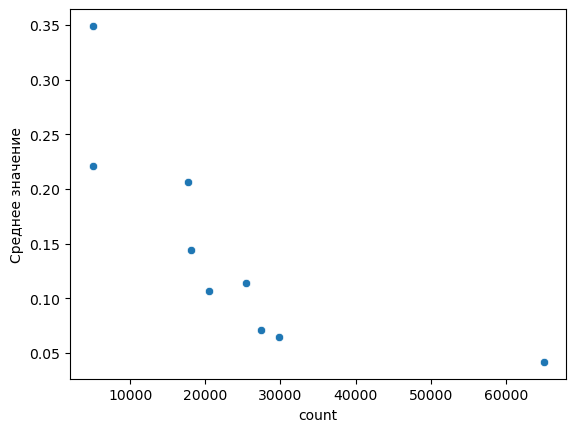

In [23]:
# Предположим, что у вас уже есть DataFrame p_values_df

# Создаем порядок сортировки для оси x
order_x = ['Москва', 'Санкт-Петербург', 'Уральский ФО', 'Приволжский ФО', 'Сибирский ФО', 'Центральный ФО', 'Дальневосточный ФО', 'Северо-Западный ФО', 'Северо-Кавказский ФО']

# Вычисляем среднее значение в каждой строке и сортируем строки
p_values_df['mean'] = p_values_df.mean(axis=1)
p_values_df = p_values_df.sort_values(by='mean', ascending=False).drop('mean', axis=1)

# Отсортируйте DataFrame
p_values_df = p_values_df[order_x]

# Создаем pivot_table с средним значением каждого столбца
pivot_table_mean = p_values_df.mean().reset_index(name='Среднее значение')
pivot_table_mean['count']=unique_resume_counts['resume_id']
# Выводим pivot_table
print(pivot_table_mean)
sns.scatterplot(pivot_table_mean, x='count', y='Среднее значение')

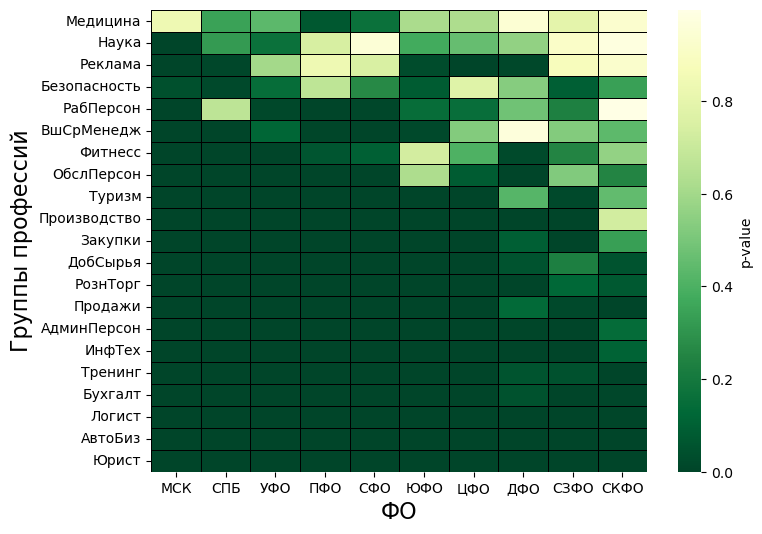

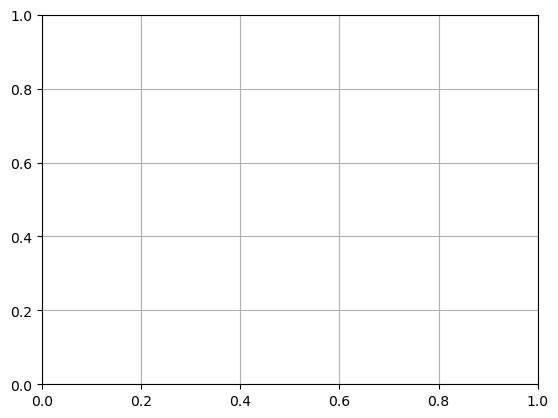

In [76]:
# Создаем порядок сортировки для оси x
order_x = ['Москва', 'Санкт-Петербург', 'Уральский ФО', 'Приволжский ФО', 'Сибирский ФО', 'Южный ФО','Центральный ФО', 'Дальневосточный ФО', 'Северо-Западный ФО', 'Северо-Кавказский ФО']

# Вычисляем среднее значение в каждой строке и сортируем строки
p_values_df['mean'] = p_values_df.mean(axis=1)
p_values_df = p_values_df.sort_values(by='mean', ascending=False).drop('mean', axis=1)

# Отсортируйте DataFrame
p_values_df = p_values_df[order_x]

# Выводим heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    p_values_df,
    cmap='YlGn_r',
    cbar_kws={'label': 'p-value'},
    linewidths=.5,
    linecolor='black'
)
plt.xticks(
    ticks=[.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
    labels=[
    'МСК', 'СПБ', 'УФО', 'ПФО', 'СФО', 'ЮФО', 'ЦФО', 'ДФО', 'СЗФО', 'СКФО'
],
    rotation=0,
    fontsize=10
)
plt.xlabel('ФО', fontsize=16)
plt.ylabel('Группы профессий', fontsize=16)
# plt.title('p-value Heatmap for t-test between successful_topic groups and work_experience_months')
plt.show()
plt.grid()

In [79]:
# Создаем пустой DataFrame для хранения p-values и t-значений
result_df = pd.DataFrame(index=df['group'].unique(), columns=df['aok'].unique())

# Проходим по уникальным комбинациям 'group' и 'aok' и вычисляем p-value и t-значение
for group_val in df['group'].unique():
    for aok_val in df['aok'].unique():
        subset_group_1 = df[(df['group'] == group_val) & (df['aok'] == aok_val) & (df['successful_topic'] == 1)]
        subset_group_0 = df[(df['group'] == group_val) & (df['aok'] == aok_val) & (df['successful_topic'] == 0)]
        
        # Выполняем t-тест
        t_stat, p_value = ttest_ind(subset_group_1['work_experience_months'], subset_group_0['work_experience_months'], equal_var=False)
        
        # Заполняем p-value и t-значение в DataFrame
        result_df.at[group_val, aok_val] = f"{t_stat:.1f} ({p_value:.3f})"

# Выводим heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(result_df, annot=True, fmt='', cbar_kws={'label': 't-value (p-value)'})
plt.xlabel('aok')
plt.ylabel('group')
plt.title('Sorted t-value Heatmap for t-test between successful_topic groups and work_experience_months')
plt.show()

ValueError: could not convert string to float: '-21.3 (0.000)'

<Figure size 1000x600 with 0 Axes>